# Benchmark Performance of New Loss Module

https://github.com/scikit-learn/scikit-learn/pull/19089

**Table of Contents** <a name="toc"></a>
- [1. LogisticRegression](#chapter_1)
- [2. HistGradientBoostingClassifier](#chapter_2)
  
Benchmark scripts "bench_loss_module_hgbt.py" and "bench_loss_module_logistic.py" are run once on master ([commit 5a63f903ff1d45084c4fd41f241bf5dfdd067680](https://github.com/scikit-learn/scikit-learn/commit/5a63f903ff1d45084c4fd41f241bf5dfdd067680)) and once on the PR. Both master and PR are compiled with `make in` and OpenMP enabled. Number of threads of OpenMP is set with `export OMP_NUM_THREADS=6` (or `export OMP_NUM_THREADS=1`) before running the scripts.

Hardware: Intel Core i7-8559U (4 cores * 2 = 8), 8th generation, 16 GB RAM<br>
Software: Python 3.7.9, numpy 1.19.5, scipy 1.5.2

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns


# See https://github.com/mwaskom/seaborn/issues/1986
#g = sns.FacetGrid(df.wall_time.reset_index(), hue="function", height =5)
#g.map(plt.errorbar, "N", "mean", yerr=df.wall_time.reset_index()['std']);

# This works
# See https://stackoverflow.com/a/30428808
def errplot(x, y, yerr, **kwargs):
    ax = plt.gca()
    data = kwargs.pop("data")
    data.plot(x=x, y=y, yerr=yerr, kind="line", ax=ax, **kwargs)
    

# export OMP_NUM_THREADS=1
df_Logistic_PR_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_1.parquet"
)
df_Logistic_PR_Threads_1["branch"] = "PR"

df_Logistic_MASTER_Threads_1 = pd.read_parquet(
    "bench_loss_module_logistic_MASTER_Threads_1.parquet"
)
df_Logistic_MASTER_Threads_1["branch"] = "master"


# export OMP_NUM_THREADS=6
df_Logistic_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_logistic_PR_Threads_6.parquet"
)
df_Logistic_PR_Threads_6["branch"] = "PR"

df_HGBT_PR_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_PR_Threads_6.parquet"
)
df_HGBT_PR_Threads_6["branch"] = "PR"

df_HGBT_MASTER_Threads_6 = pd.read_parquet(
    "bench_loss_module_hgbt_MASTER_Threads_6.parquet"
)
df_HGBT_MASTER_Threads_6["branch"] = "master"

## 1. LogisticRegression <a name="chapter_1"></a>
[back to TOC](#toc)

`n_features = 50`

In [2]:
df = pd.concat([
    df_Logistic_PR_Threads_1, df_Logistic_PR_Threads_6, df_Logistic_MASTER_Threads_1
])
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 1), ["branch"]] = "PR n_threads=1"
df.loc[(df["branch"] == "PR") & (df["n_threads"] == 6), ["branch"]] = "PR n_threads=6"
df = df.set_index(["n_classes", "branch"], append=True)
df.head()

wall_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011542  0.013257  0.000945   
      newton-cg 2         PR n_threads=1  0.008026  0.008417  0.000312   
1000  lbfgs     2         PR n_threads=1  0.007494  0.008172  0.000390   
      newton-cg 2         PR n_threads=1  0.009929  0.010577  0.000383   
10000 lbfgs     2         PR n_threads=1  0.034399  0.035926  0.001660   

                                          cpu_time                      \
                                              mean       max       std   
N     solver    n_classes branch                                         
100   lbfgs     2         PR n_threads=1  0.011662  0.012529  0.000542   
      newton-cg 2         PR n_threads=1  0.008043  0.008882  0.000502   
1000  lbfgs     2         PR n_threads=1  0.007305  0.008235  0.000432   
      newton-cg 2         PR n_threads=1  0.010811  0.017188  0.002314   
10000 lbfgs     2         PR n_threads=1  0.035931  0.062721  0.009489   

                                         peak_memory                      \
                                                mean       max       std   
N     solver    n_classes branch                                           
100   lbfgs     2         PR n_threads=1    0.003516  0.035156  0.011117   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
1000  lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   
      newton-cg 2         PR n_threads=1    0.000000  0.000000  0.000000   
10000 lbfgs     2         PR n_threads=1    0.000000  0.000000  0.000000   

                                                   estimator n_threads  
                                                                        
N     solver    n_classes branch                                        
100   lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
1000  lbfgs     2         PR n_threads=1  LogisticRegression         1  
      newton-cg 2         PR n_threads=1  LogisticRegression         1  
10000 lbfgs     2         PR n_threads=1  LogisticRegression         1

Text(0.5, 0.98, 'Logistic Regression: Wall Time')

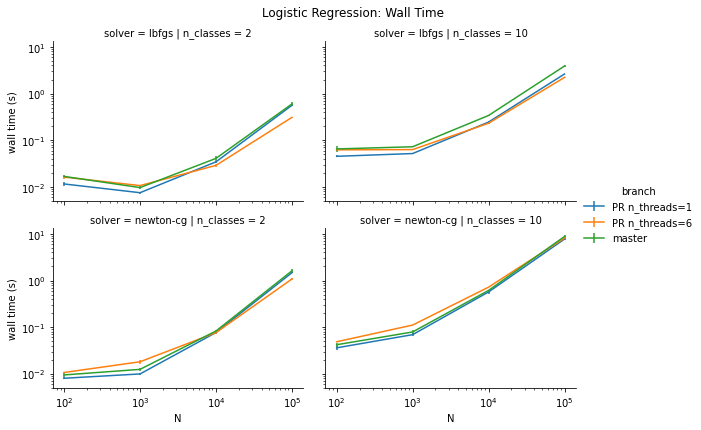

In [3]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: CPU Time')

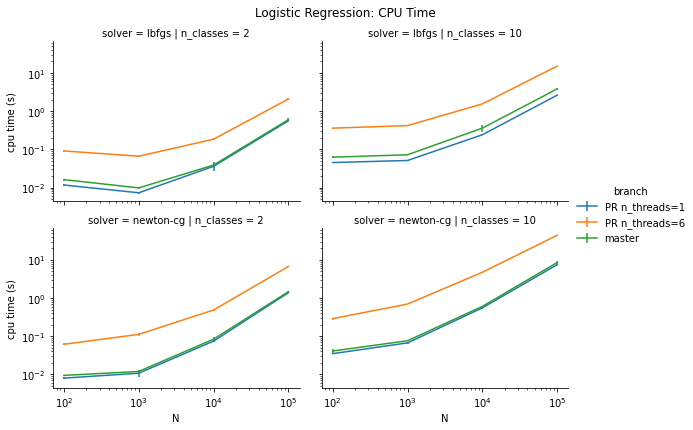

In [4]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Logistic Regression: Peak Memory')

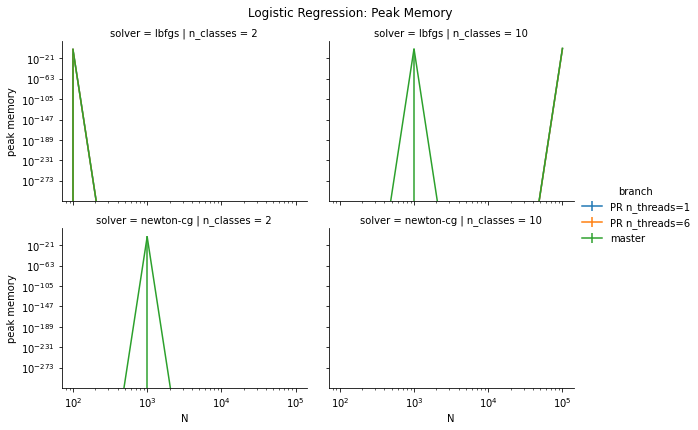

In [5]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Logistic Regression: Peak Memory", fontsize=12)

Error propagation: $\sigma^2(x/y) \approx \left(\frac{\partial}{\partial x}\frac{x}{y}\right)^2 \sigma_x^2 + \left(\frac{\partial}{\partial y}\frac{x}{y}\right)^2 \sigma_y^2
= \frac{1}{y^2} \sigma_x^2 + \frac{x^2}{y^4} \sigma_y^2 $

In [6]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "solver", "n_classes"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "solver", "n_classes", "branch", "mean", "std"]]
df_plot.head()

,N,solver,n_classes,branch,mean,std
0,100,lbfgs,2,PR n_threads=1,0.688741,0.067066
1,100,lbfgs,2,PR n_threads=6,0.966700,0.090805
2,100,lbfgs,2,master,1.000000,0.074459
3,100,newton-cg,2,PR n_threads=1,0.849085,0.077504
4,100,newton-cg,2,PR n_threads=6,1.128017,0.103934


In [7]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR n_threads=1", 'N'] *= 0.95
df_plot.loc[df_plot["branch"] == "PR n_threads=6", 'N'] *= 1.05

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master')

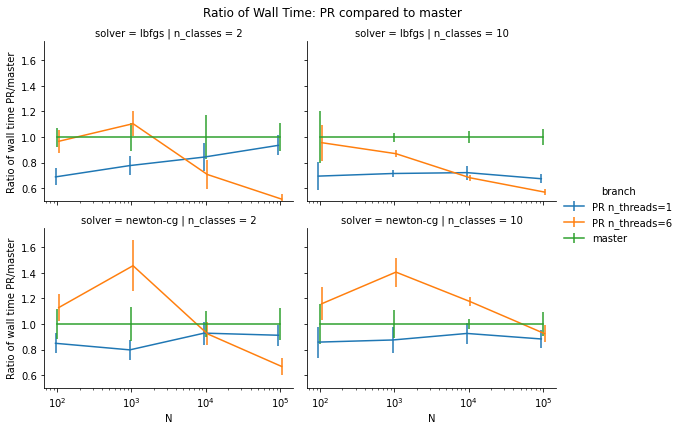

In [8]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", row="solver", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.75))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.9)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")

## 2. HistGradientBoostingClassifier <a name="chapter_2"></a>
[back to TOC](#toc)

`n_features = 20`

In [9]:
df = pd.concat([df_HGBT_PR_Threads_6, df_HGBT_MASTER_Threads_6])
df = df.set_index(["n_classes", "branch"], append=True)
df

wall_time                        cpu_time             \
                              mean        max       std       mean        max   
N      n_classes branch                                                         
100    2         PR       0.028472   0.031996  0.002306   0.163637   0.220965   
1000   2         PR       0.284659   0.356738  0.023656   1.590129   1.967478   
10000  2         PR       0.559104   0.601412  0.013552   3.159335   3.303025   
100000 2         PR       1.309056   1.343944  0.030674   6.878346   7.085540   
100    10        PR       0.118411   0.166457  0.017681   0.724212   1.673198   
1000   10        PR       1.332853   1.823541  0.222142   7.719869  10.111768   
10000  10        PR       4.864083   4.960249  0.072078  27.323312  27.733967   
100000 10        PR       9.380271   9.537143  0.125534  52.334870  53.093096   
100    2         master   0.027240   0.031895  0.002318   0.164932   0.232732   
1000   2         master   0.295419   0.342277  0.030399   1.834972   2.214671   
10000  2         master   0.611335   0.690455  0.024240   3.418482   3.572814   
100000 2         master   1.696176   1.764046  0.031351   9.016512   9.904523   
100    10        master   0.118042   0.166235  0.020583   0.951346   1.556604   
1000   10        master   1.387403   1.754096  0.181686   8.702731  11.988736   
10000  10        master   5.262207   5.467823  0.103710  29.544356  30.254682   
100000 10        master  12.119927  12.651383  0.216978  67.415104  68.984371   

                                  peak_memory                       \
                              std        mean        max       std   
N      n_classes branch                                              
100    2         PR      0.033141    0.004297   0.046875  0.013286   
1000   2         PR      0.234836    0.039258   0.136719  0.047681   
10000  2         PR      0.063957    3.172266   3.750000  0.375751   
100000 2         PR      0.135753   24.785156  25.195312  0.419554   
100    10        PR      0.353103    0.060352   0.570312  0.174073   
1000   10        PR      1.304068    0.771289   1.406250  0.377292   
10000  10        PR      0.276616    4.647070   5.062500  0.236830   
100000 10        PR      0.597626   37.656445  37.960938  0.231754   
100    2         master  0.036890    0.000195   0.003906  0.000873   
1000   2         master  0.201997    0.052344   0.195312  0.061612   
10000  2         master  0.081229    3.551758   4.035156  0.353903   
100000 2         master  0.273710   25.456055  25.992188  0.531753   
100    10        master  0.346950    0.031055   0.472656  0.109099   
1000   10        master  1.716111    0.982422   1.351562  0.430551   
10000  10        master  0.453618    6.479297   7.417969  0.686229   
100000 10        master  1.022072   61.773047  62.382812  0.272115   

                                              estimator n_threads  
                                                                   
N      n_classes branch                                            
100    2         PR      HistGradientBoostingClassifier         6  
1000   2         PR      HistGradientBoostingClassifier         6  
10000  2         PR      HistGradientBoostingClassifier         6  
100000 2         PR      HistGradientBoostingClassifier         6  
100    10        PR      HistGradientBoostingClassifier         6  
1000   10        PR      HistGradientBoostingClassifier         6  
10000  10        PR      HistGradientBoostingClassifier         6  
100000 10        PR      HistGradientBoostingClassifier         6  
100    2         master  HistGradientBoostingClassifier         6  
1000   2         master  HistGradientBoostingClassifier         6  
10000  2         master  HistGradientBoostingClassifier         6  
100000 2         master  HistGradientBoostingClassifier         6  
100    10        master  HistGradientBoostingClassifier         6  
1000   10        master  HistGradientBoostingClassifier         6 

Text(0.5, 0.98, 'Histogram Gradient Boosting: Wall Time')

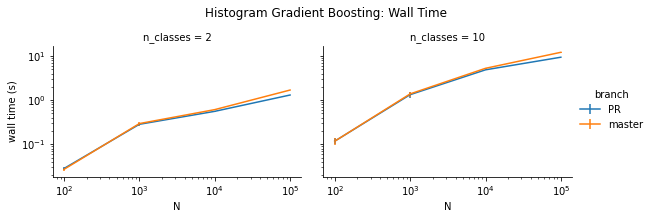

In [10]:
g = sns.FacetGrid(df.wall_time.reset_index(), hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="wall time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Wall Time", fontsize=12)

Text(0.5, 0.98, 'Histogram Gradient Boosting: CPU Time')

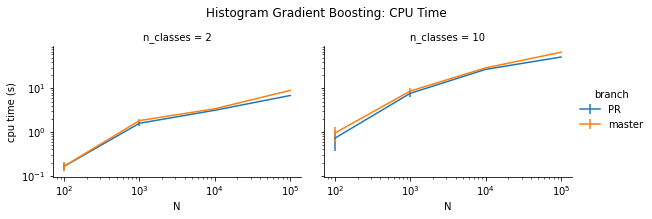

In [11]:
g = sns.FacetGrid(df.cpu_time.reset_index(), hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="cpu time (s)")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: CPU Time", fontsize=12)

Text(0.5, 0.98, 'Histogram Gradient Boosting: Peak Memory')

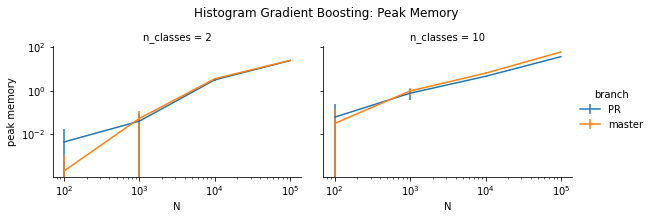

In [12]:
g = sns.FacetGrid(df.peak_memory.reset_index(), hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(xscale="log", yscale="log")
g.set_axis_labels(y_var="peak memory")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Histogram Gradient Boosting: Peak Memory", fontsize=12)

In [13]:
df_reference = df.wall_time.reset_index().query("branch == 'master'")
df_plot = pd.merge(df.wall_time.reset_index(), df_reference, on=["N", "n_classes"], suffixes=("", "_master"))
df_plot["std"] = np.sqrt(df_plot["std"]**2 / df_plot["mean_master"]**2
                         + df_plot['mean']**2 / df_plot["mean_master"]**4 * df_plot["std_master"]**2)
df_plot["mean"] = df_plot["mean"] / df_plot["mean_master"]
df_plot = df_plot.loc[:, ["N", "n_classes", "branch", "mean", "std"]]
df_plot.head()

,N,n_classes,branch,mean,std
0,100,2,PR,1.045214,0.122788
1,100,2,master,1.000000,0.120334
2,1000,2,PR,0.963577,0.127452
3,1000,2,master,1.000000,0.145526
4,10000,2,PR,0.914563,0.042502


In [14]:
# shift N slightly to make visualization easier
df_plot.loc[df_plot["branch"] == "PR", 'N'] *= 0.95

Text(0.5, 0.98, 'Ratio of Wall Time: PR compared to master')

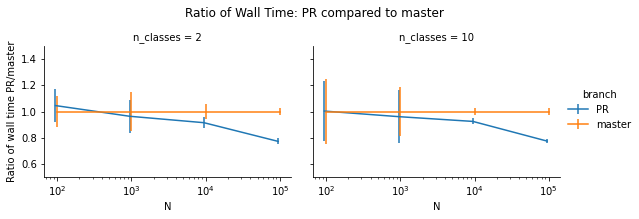

In [15]:
g = sns.FacetGrid(df_plot, hue="branch", col="n_classes", height=3, aspect=4/3)
g.map_dataframe(errplot, "N", "mean", "std")
g.set(ylim=(0.5, 1.5))
g.set(xscale="log")
g.set_axis_labels(y_var="Ratio of wall time PR/master")
g.add_legend()
plt.subplots_adjust(top=0.8)
g.fig.suptitle("Ratio of Wall Time: PR compared to master")